<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.156872,44.963951,50.681684,42.572716,-0.000335,212.374888,212.374635,0.000253
1,0.0,1.0,96.618721,71.462516,88.145519,50.253294,0.000882,316.480933,316.479673,0.001259
2,0.0,2.0,34.377085,23.407454,54.504617,73.891791,-0.000825,196.180123,196.180349,-0.000227
3,0.0,3.0,35.031857,73.162198,56.383939,38.879125,-0.000893,213.456227,213.457064,-0.000838
4,0.0,4.0,41.013740,98.280094,73.685104,77.549393,-0.000030,300.528301,300.528905,-0.000605
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,42.352116,95.404607,72.138811,93.459075,-0.000030,313.354580,313.354341,0.000239
119996,999.0,116.0,69.708296,65.661173,71.592637,34.094932,-0.000084,251.056954,251.057276,-0.000322
119997,999.0,117.0,81.378640,83.772243,36.301790,28.717136,0.000423,240.170232,240.170329,-0.000097
119998,999.0,118.0,37.390185,49.383051,91.397140,54.781449,-0.000912,242.950913,242.951513,-0.000601


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.156872  44.963951  50.681684  42.572716 -0.000335  212.374888   
      1.0    96.618721  71.462516  88.145519  50.253294  0.000882  316.480933   
      2.0    34.377085  23.407454  54.504617  73.891791 -0.000825  196.180123   
      3.0    35.031857  73.162198  56.383939  38.879125 -0.000893  213.456227   
      4.0    41.013740  98.280094  73.685104  77.549393 -0.000030  300.528301   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.352116  95.404607  72.138811  93.459075 -0.000030  313.354580   
      116.0  69.708296  65.661173  71.592637  34.094932 -0.000084  251.056954   
      117.0  81.378640  83.772243  36.301790  28.717136  0.000423  240.170232   
      118.0  37.390185  49.383051  91.397140  54.781449 -0.000912  242.950913   
      119.0  47.009488  37.527747  75.390411  83.250154 -0.000682  253.177118   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    212.374635  0.000253  
      1.0    316.479673  0.001259  
      2.0    196.180349 -0.000227  
      3.0    213.457064 -0.000838  
      4.0    300.528905 -0.000605  
...                 ...       ...  
999.0 115.0  313.354341  0.000239  
      116.0  251.057276 -0.000322  
      117.0  240.170329 -0.000097  
      118.0  242.951513 -0.000601  
      119.0  253.177493 -0.000376  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.156872  44.963951  50.681684  42.572716 -0.000335  212.374888   
      1.0    96.618721  71.462516  88.145519  50.253294  0.000882  316.480933   
      2.0    34.377085  23.407454  54.504617  73.891791 -0.000825  196.180123   
      3.0    35.031857  73.162198  56.383939  38.879125 -0.000893  213.456227   
      4.0    41.013740  98.280094  73.685104  77.549393 -0.000030  300.528301   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.352116  95.404607  72.138811  93.459075 -0.000030  313.354580   
      116.0  69.708296  65.661173  71.592637  34.094932 -0.000084  251.056954   
      117.0  81.378640  83.772243  36.301790  28.717136  0.000423  240.170232   
      118.0  37.390185  49.383051  91.397140  54.781449 -0.000912  242.950913   
      119.0  47.009488  37.527747  75.390411  83.250154 -0.000682  253.177118   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    212.374635  0.000253  
      1.0    316.479673  0.001259  
      2.0    196.180349 -0.000227  
      3.0    213.457064 -0.000838  
      4.0    300.528905 -0.000605  
...                 ...       ...  
999.0 115.0  313.354341  0.000239  
      116.0  251.057276 -0.000322  
      117.0  240.170329 -0.000097  
      118.0  242.951513 -0.000601  
      119.0  253.177493 -0.000376  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,64.156872,44.963951,50.681684,42.572716,-0.000335,212.374888,212.374635,0.000253
1,0.0,1.0,96.618721,71.462516,88.145519,50.253294,0.000882,316.480933,316.479673,0.001259
2,0.0,2.0,34.377085,23.407454,54.504617,73.891791,-0.000825,196.180123,196.180349,-0.000227
3,0.0,3.0,35.031857,73.162198,56.383939,38.879125,-0.000893,213.456227,213.457064,-0.000838
4,0.0,4.0,41.013740,98.280094,73.685104,77.549393,-0.000030,300.528301,300.528905,-0.000605
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,42.352116,95.404607,72.138811,93.459075,-0.000030,313.354580,313.354341,0.000239
119996,999.0,116.0,69.708296,65.661173,71.592637,34.094932,-0.000084,251.056954,251.057276,-0.000322
119997,999.0,117.0,81.378640,83.772243,36.301790,28.717136,0.000423,240.170232,240.170329,-0.000097
119998,999.0,118.0,37.390185,49.383051,91.397140,54.781449,-0.000912,242.950913,242.951513,-0.000601


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    64.156872  44.963951  50.681684  42.572716 -0.000335  212.374888   
      1.0    96.618721  71.462516  88.145519  50.253294  0.000882  316.480933   
      2.0    34.377085  23.407454  54.504617  73.891791 -0.000825  196.180123   
      3.0    35.031857  73.162198  56.383939  38.879125 -0.000893  213.456227   
      4.0    41.013740  98.280094  73.685104  77.549393 -0.000030  300.528301   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  42.352116  95.404607  72.138811  93.459075 -0.000030  313.354580   
      116.0  69.708296  65.661173  71.592637  34.094932 -0.000084  251.056954   
      117.0  81.378640  83.772243  36.301790  28.717136  0.000423  240.170232   
      118.0  37.390185  49.383051  91.397140  54.781449 -0.000912  242.950913   
      119.0  47.009488  37.527747  75.390411  83.250154 -0.000682  253.177118   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    212.374635  0.000253  
      1.0    316.479673  0.001259  
      2.0    196.180349 -0.000227  
      3.0    213.457064 -0.000838  
      4.0    300.528905 -0.000605  
...                 ...       ...  
999.0 115.0  313.354341  0.000239  
      116.0  251.057276 -0.000322  
      117.0  240.170329 -0.000097  
      118.0  242.951513 -0.000601  
      119.0  253.177493 -0.000376  

[120000 rows x 8 columns]

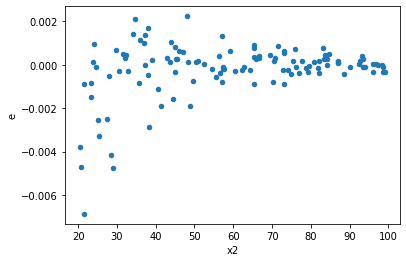

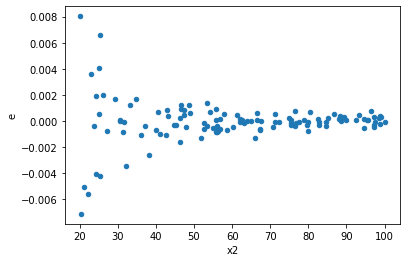

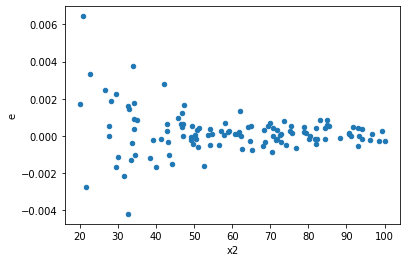

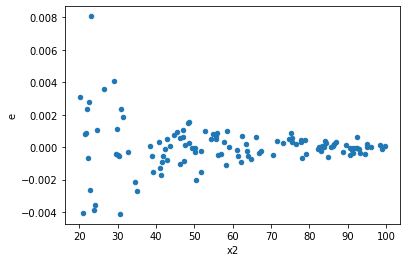

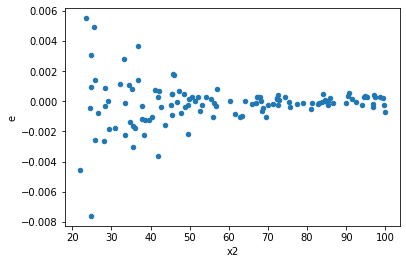

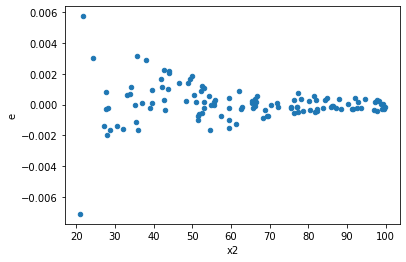

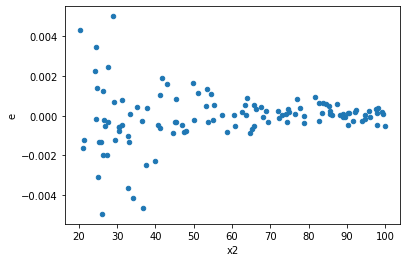

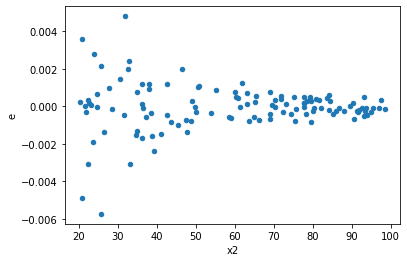

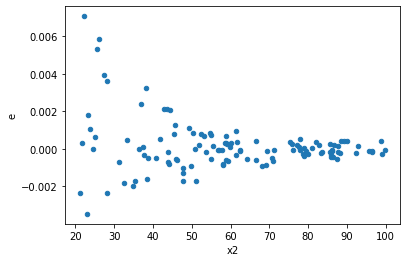

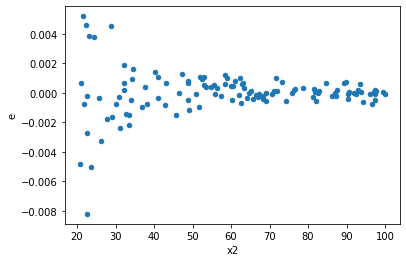

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,53.0,59.0,3.693743590355049e-05,0.00012471877077426978,6.969327528971791e-07,2.1138774707503353e-06,3.033115407423251,4.676338397913149e-05,0.9999766183080104,2.3381691989565745e-05,Reject005=0 : Heteroscedasticity
4.0,54.0,58.0,7.1794404047361e-06,0.0002443095281823581,1.3295260008770557e-07,4.2122332445234155e-06,31.68221788625953,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,57.0,55.0,8.537145161376597e-06,0.0001836277193272265,1.497744765153789e-07,3.338685805949573e-06,22.29142029821587,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
11.0,54.0,58.0,3.340745443633838e-05,4.150229400875845e-05,6.186565636358959e-07,7.15556793254456e-07,1.1566300841440516,0.5856836300959714,0.7071581849520143,0.2928418150479857,Reject005=1 : Homoscedasticity
18.0,51.0,61.0,5.202781011866229e-05,7.912740827102207e-05,1.0201531395816136e-06,1.2971706273938044e-06,1.271545003454875,0.36737234086530424,0.8163138295673479,0.18368617043265212,Reject005=1 : Homoscedasticity
19.0,47.0,65.0,1.1343581193826438e-05,0.0004012597548844093,2.413527913580093e-07,6.173226998221682e-06,25.577607631911164,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
22.0,68.0,44.0,8.89512688423052e-05,0.0001352512555808084,1.3081068947397823e-06,3.0738921722911e-06,2.3498784271010056,0.003094199096668415,0.9984529004516658,0.0015470995483342076,Reject005=0 : Heteroscedasticity
23.0,58.0,54.0,0.00010825757449495338,0.0001427175944995705,1.866509905085403e-06,2.642918416658713e-06,1.4159680639561272,0.19854328161764645,0.9007283591911768,0.09927164080882322,Reject005=1 : Homoscedasticity
24.0,60.0,52.0,7.911806688994207e-05,0.0001429620403344501,1.3186344481657012e-06,2.749270006431733e-06,2.0849371941223973,0.007556281886375249,0.9962218590568124,0.0037781409431876245,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,53.0,59.0,3.693743590355049e-05,0.00012471877077426978,6.969327528971791e-07,2.1138774707503353e-06,3.033115407423251,4.676338397913149e-05,Reject005=0 : Heteroscedasticity
1.0,59.0,53.0,0.000323563796490006,1.4191496415274276e-05,5.484132143898407e-06,2.6776408330706183e-07,0.04882524276971947,1.8633255233693087e-23,Reject005=0 : Heteroscedasticity
2.0,45.0,67.0,8.625086367890191e-05,6.858992520351523e-05,1.9166858595311535e-06,1.0237302269181378e-06,0.5341147699438632,0.027088359871654418,Reject005=0 : Heteroscedasticity
3.0,67.0,45.0,0.00023628946939018375,9.26165545747154e-06,3.5267084983609514e-06,2.0581456572158975e-07,0.05835882546494634,6.518095365845848e-23,Reject005=0 : Heteroscedasticity
4.0,54.0,58.0,7.1794404047361e-06,0.0002443095281823581,1.3295260008770557e-07,4.2122332445234155e-06,31.68221788625953,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,51.0,61.0,0.00012231410790032411,5.437607854551881e-05,2.398315841182826e-06,8.914111236970297e-07,0.37168212309242576,0.00039382838216474477,Reject005=0 : Heteroscedasticity
6.0,57.0,55.0,8.537145161376597e-06,0.0001836277193272265,1.497744765153789e-07,3.338685805949573e-06,22.29142029821587,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,50.0,62.0,0.00017007190549728446,1.1436012986404087e-05,3.4014381099456892e-06,1.8445182236135625e-07,0.0542275991504962,6.462218881919255e-20,Reject005=0 : Heteroscedasticity
8.0,51.0,61.0,0.00015647478483467043,6.388082151812672e-05,3.06813303597393e-06,1.0472265822643725e-06,0.3413237203164325,0.00012645412462942236,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    680
Reject005=1 : Homoscedasticity      320
Name: Result_test, dtype: int64